In [2]:
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
IMAGE_DPI = 300

Clear results directory

In [4]:
# remove results/results.csv if it exists
if os.path.exists('results/results.csv'):
    os.remove('results/results.csv')

Clear output images

In [5]:
for file in os.listdir('images/output'):
    if file.endswith(('.png', '.jpg', '.jpeg', '.webp')):
        os.remove(f'images/output/{file}')

In [6]:
subprocess.run(['bash', '-c', './simple.sh'])

Progress: [##################################################] 100%


In [12]:
ztool_scores = {}
tool_durations = {}

df = pd.read_csv(
    f'results/results.csv',
    header=None,
    names=[
        'tool',
        'file_name',
        'original_file_format',
        'original_file_size',
        'operation',
        'new_file_format',
        'duration_in_seconds',
        'new_file_size'
    ]
)

df['cost'] = 100 * df['new_file_size'] / df['original_file_size'] * df['duration_in_seconds']
df['duration_in_ms'] = df['duration_in_seconds'] * 1000

# Visualizations

In [26]:
sns.set_theme()
tools = df['tool'].unique()
colors = sns.color_palette('mako', len(tools))
operations = df['operation'].unique()

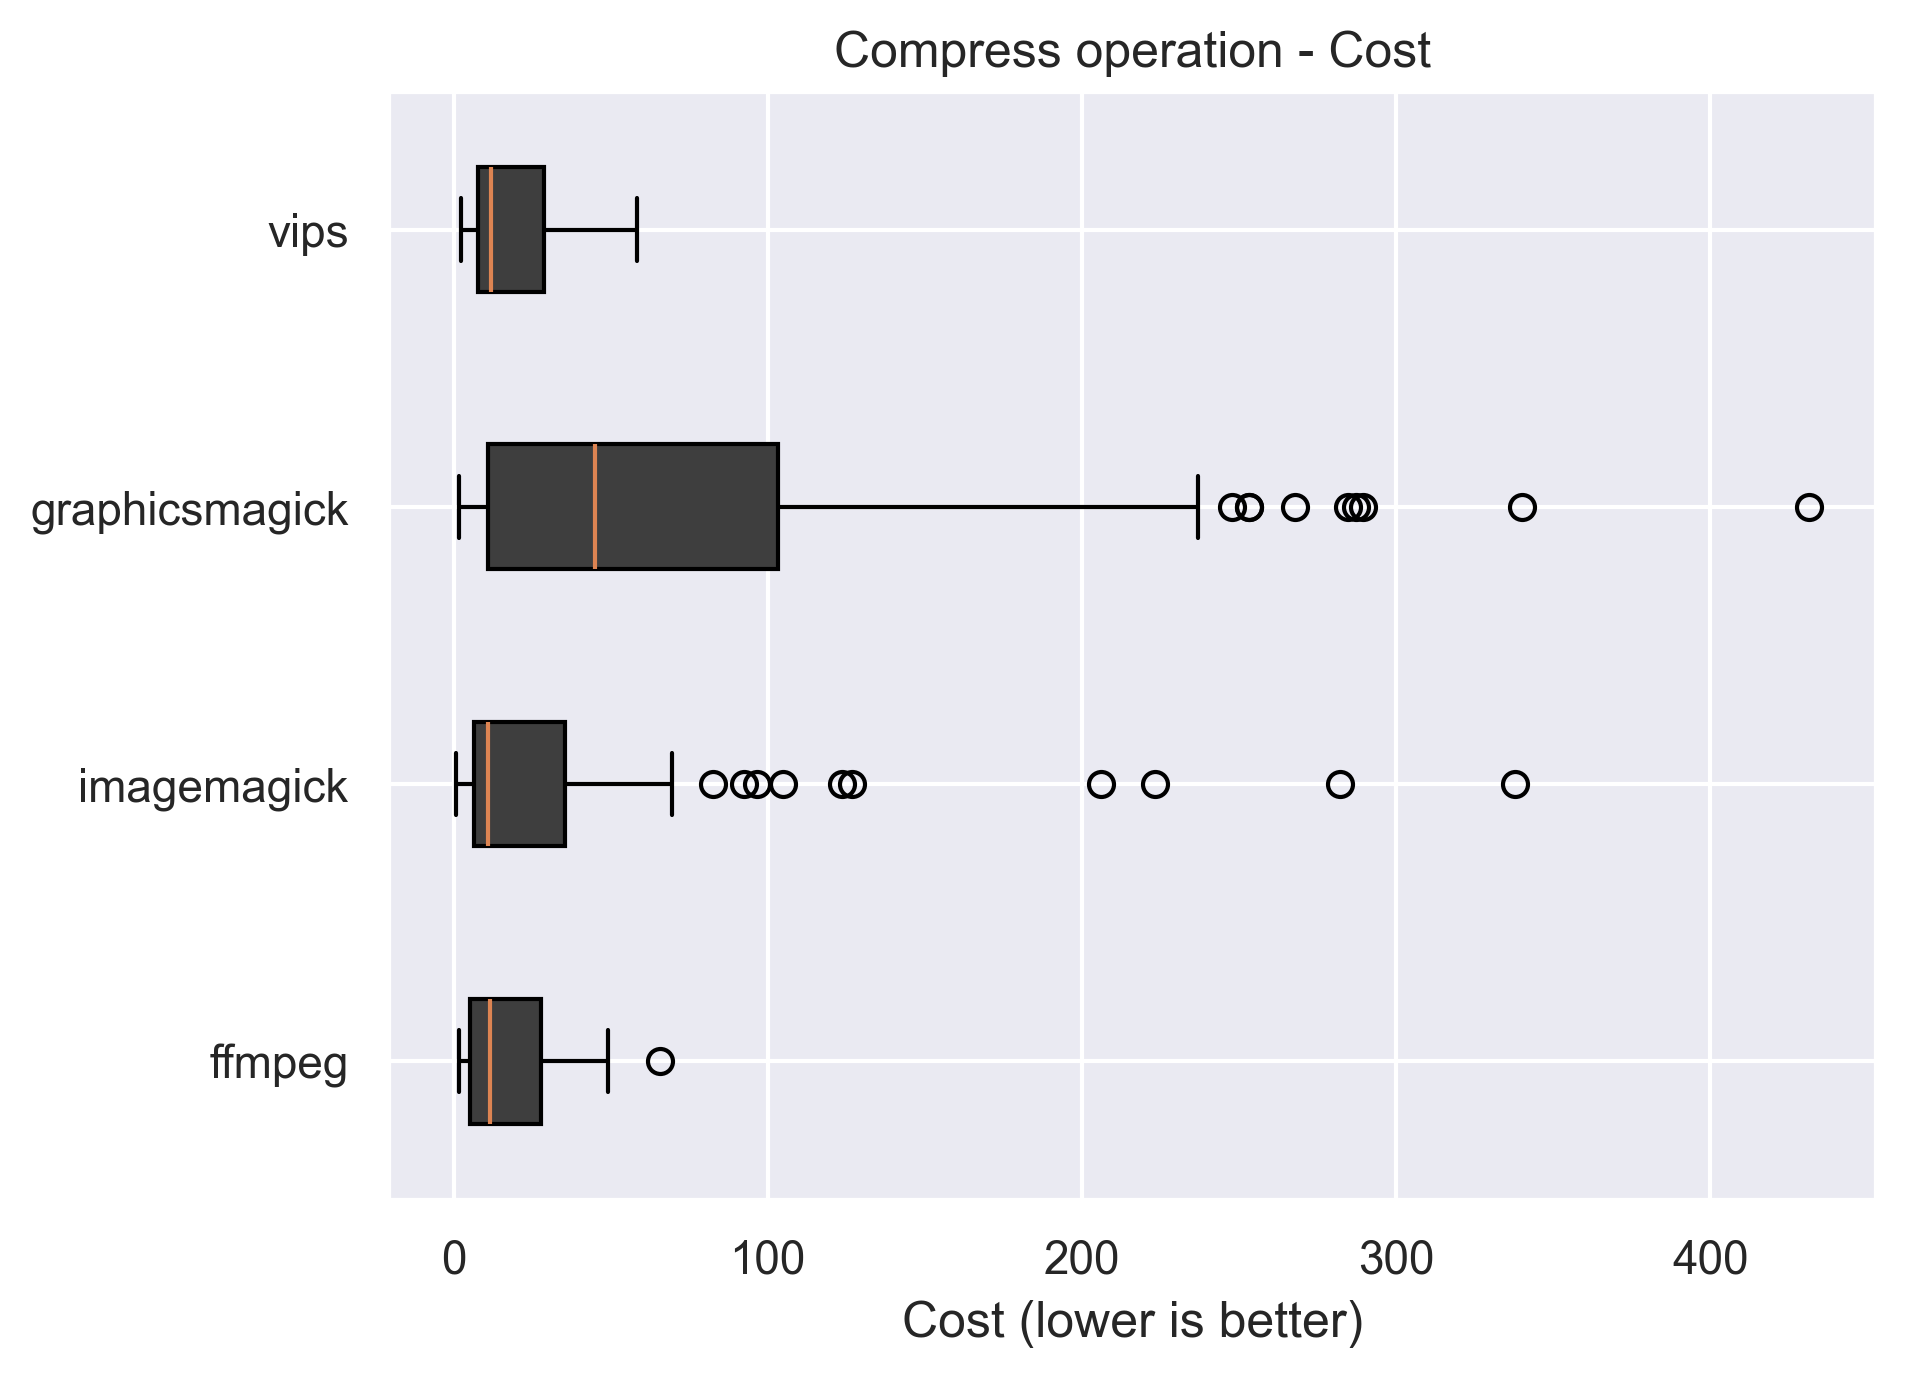

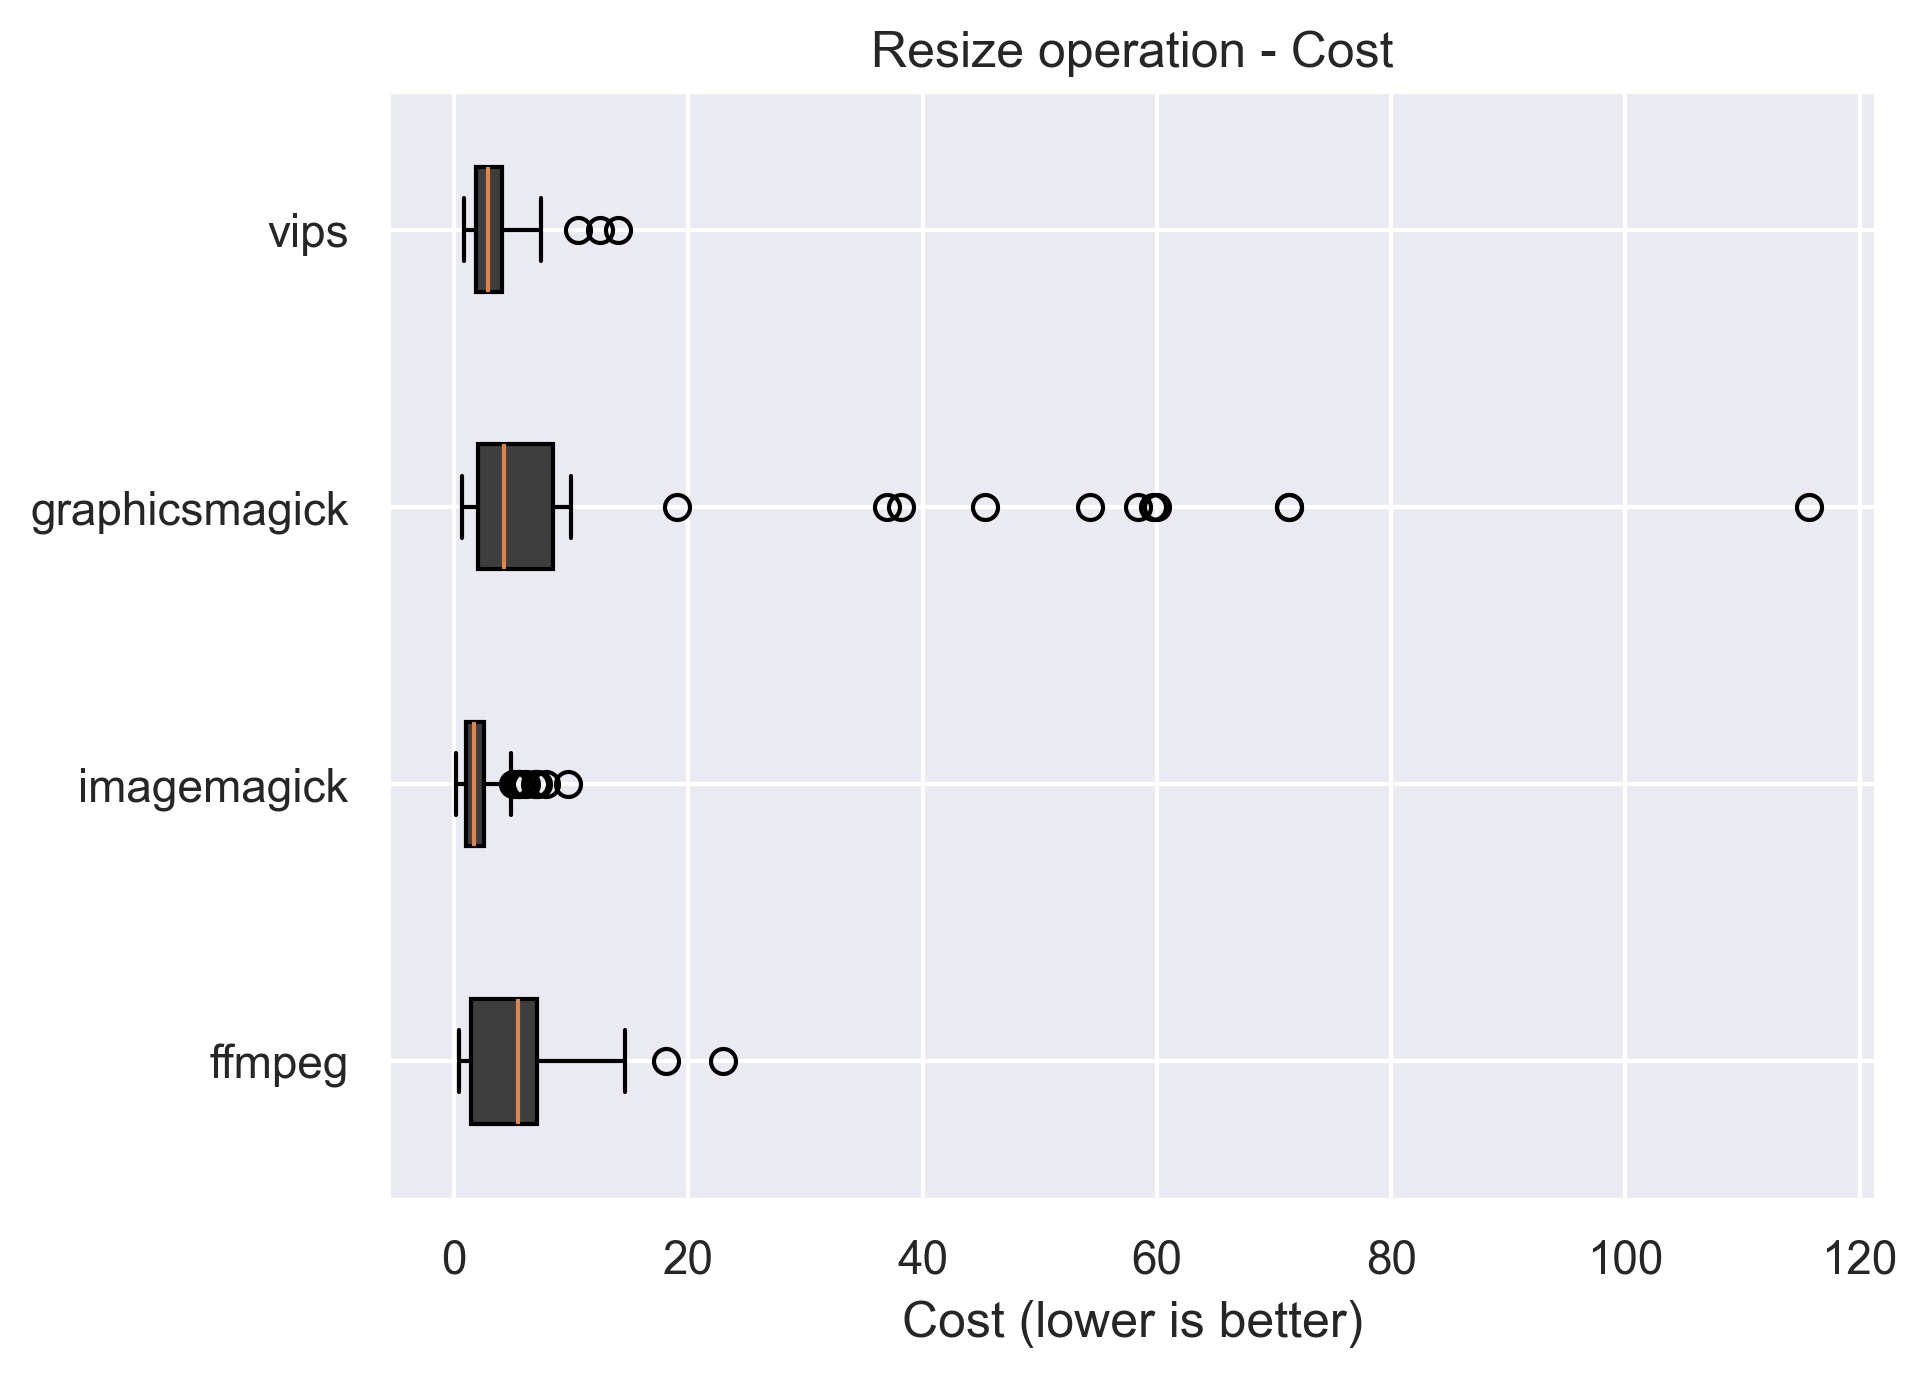

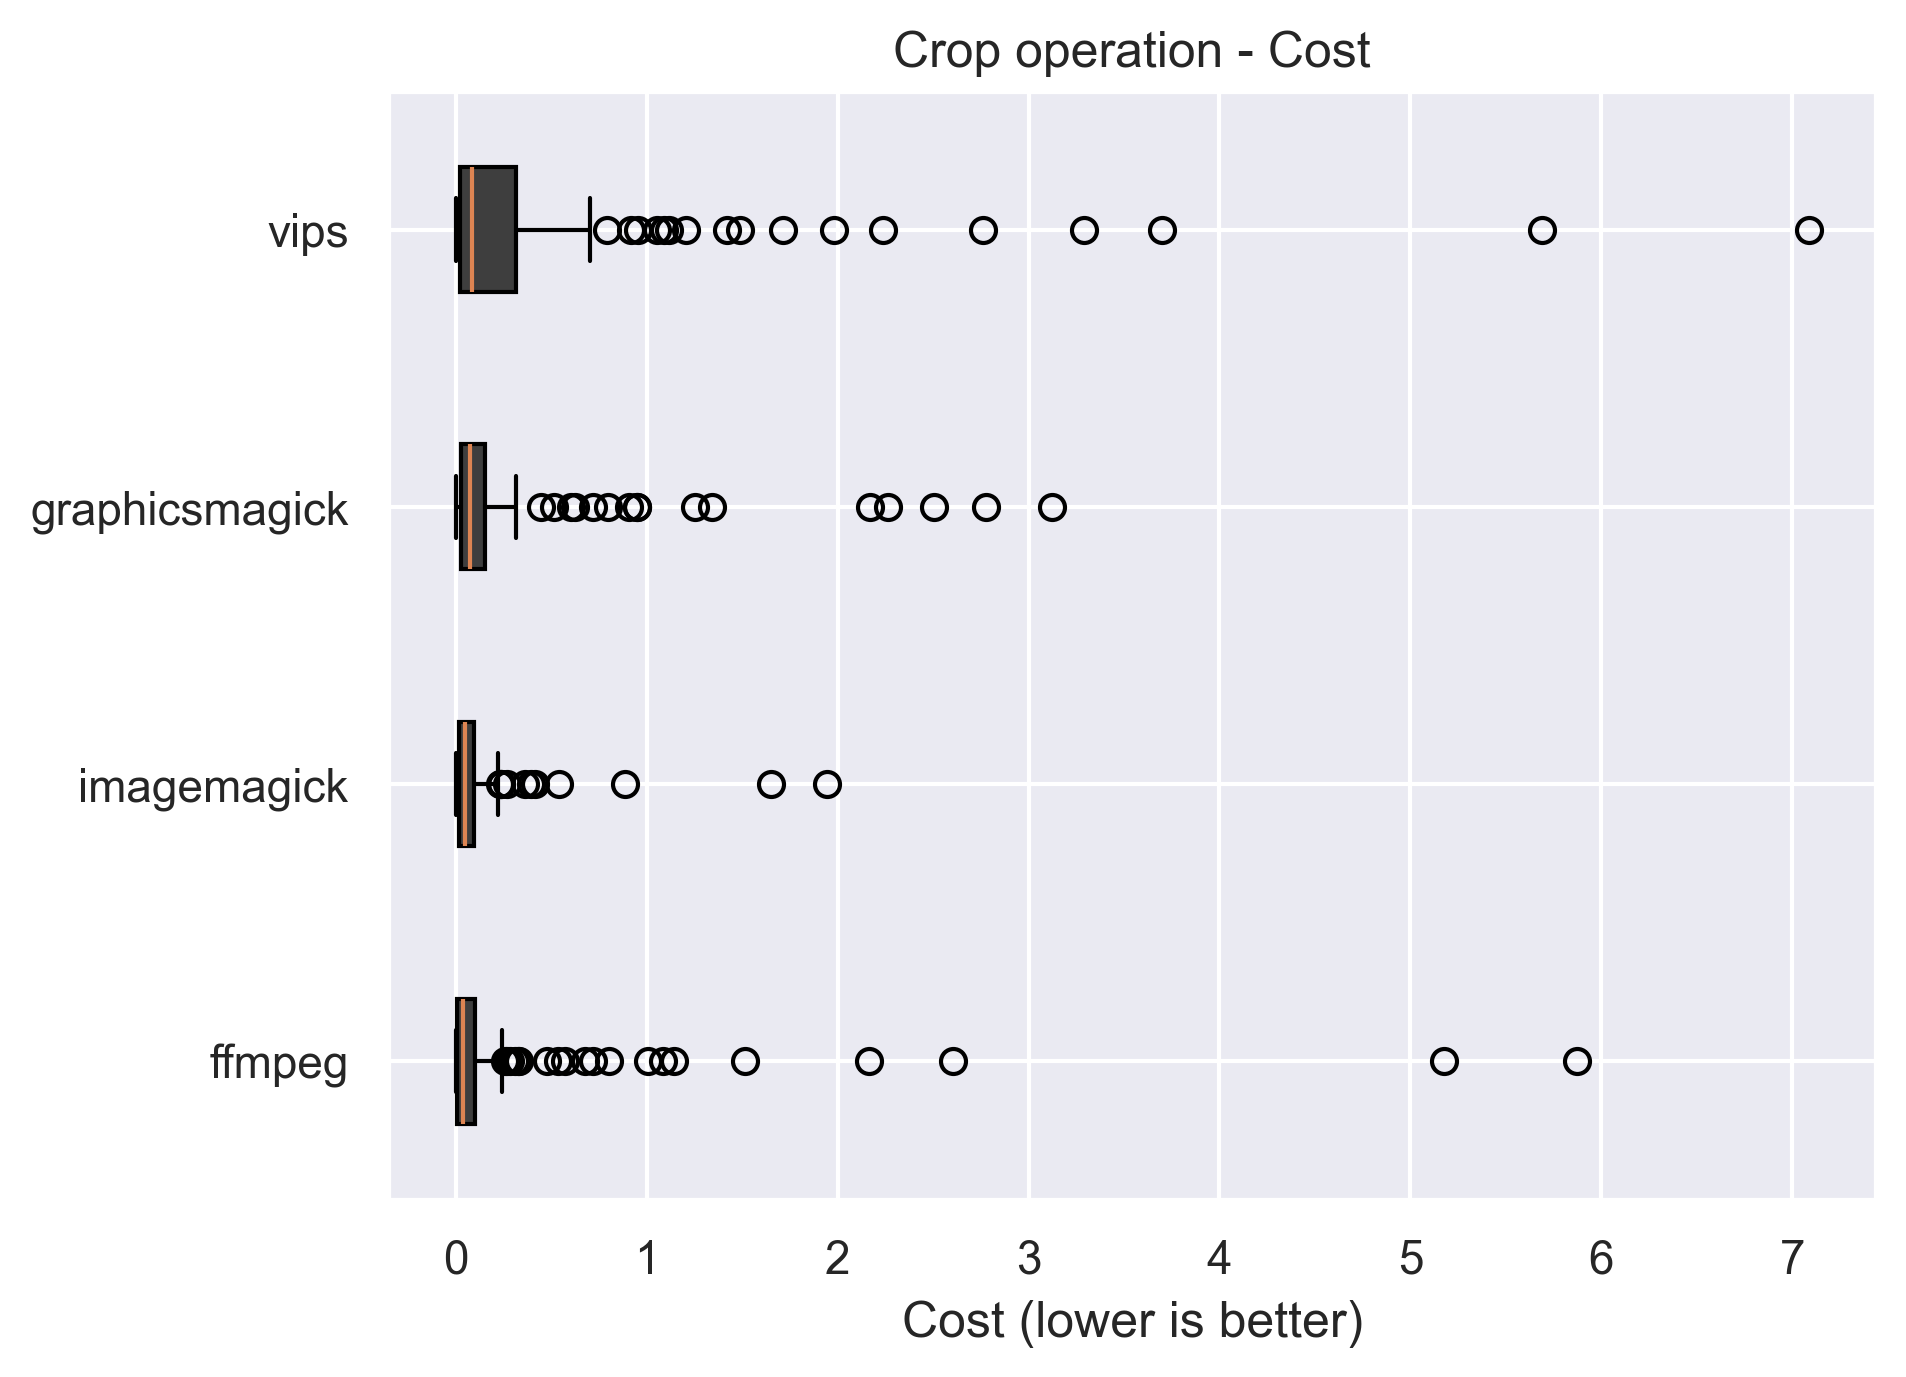

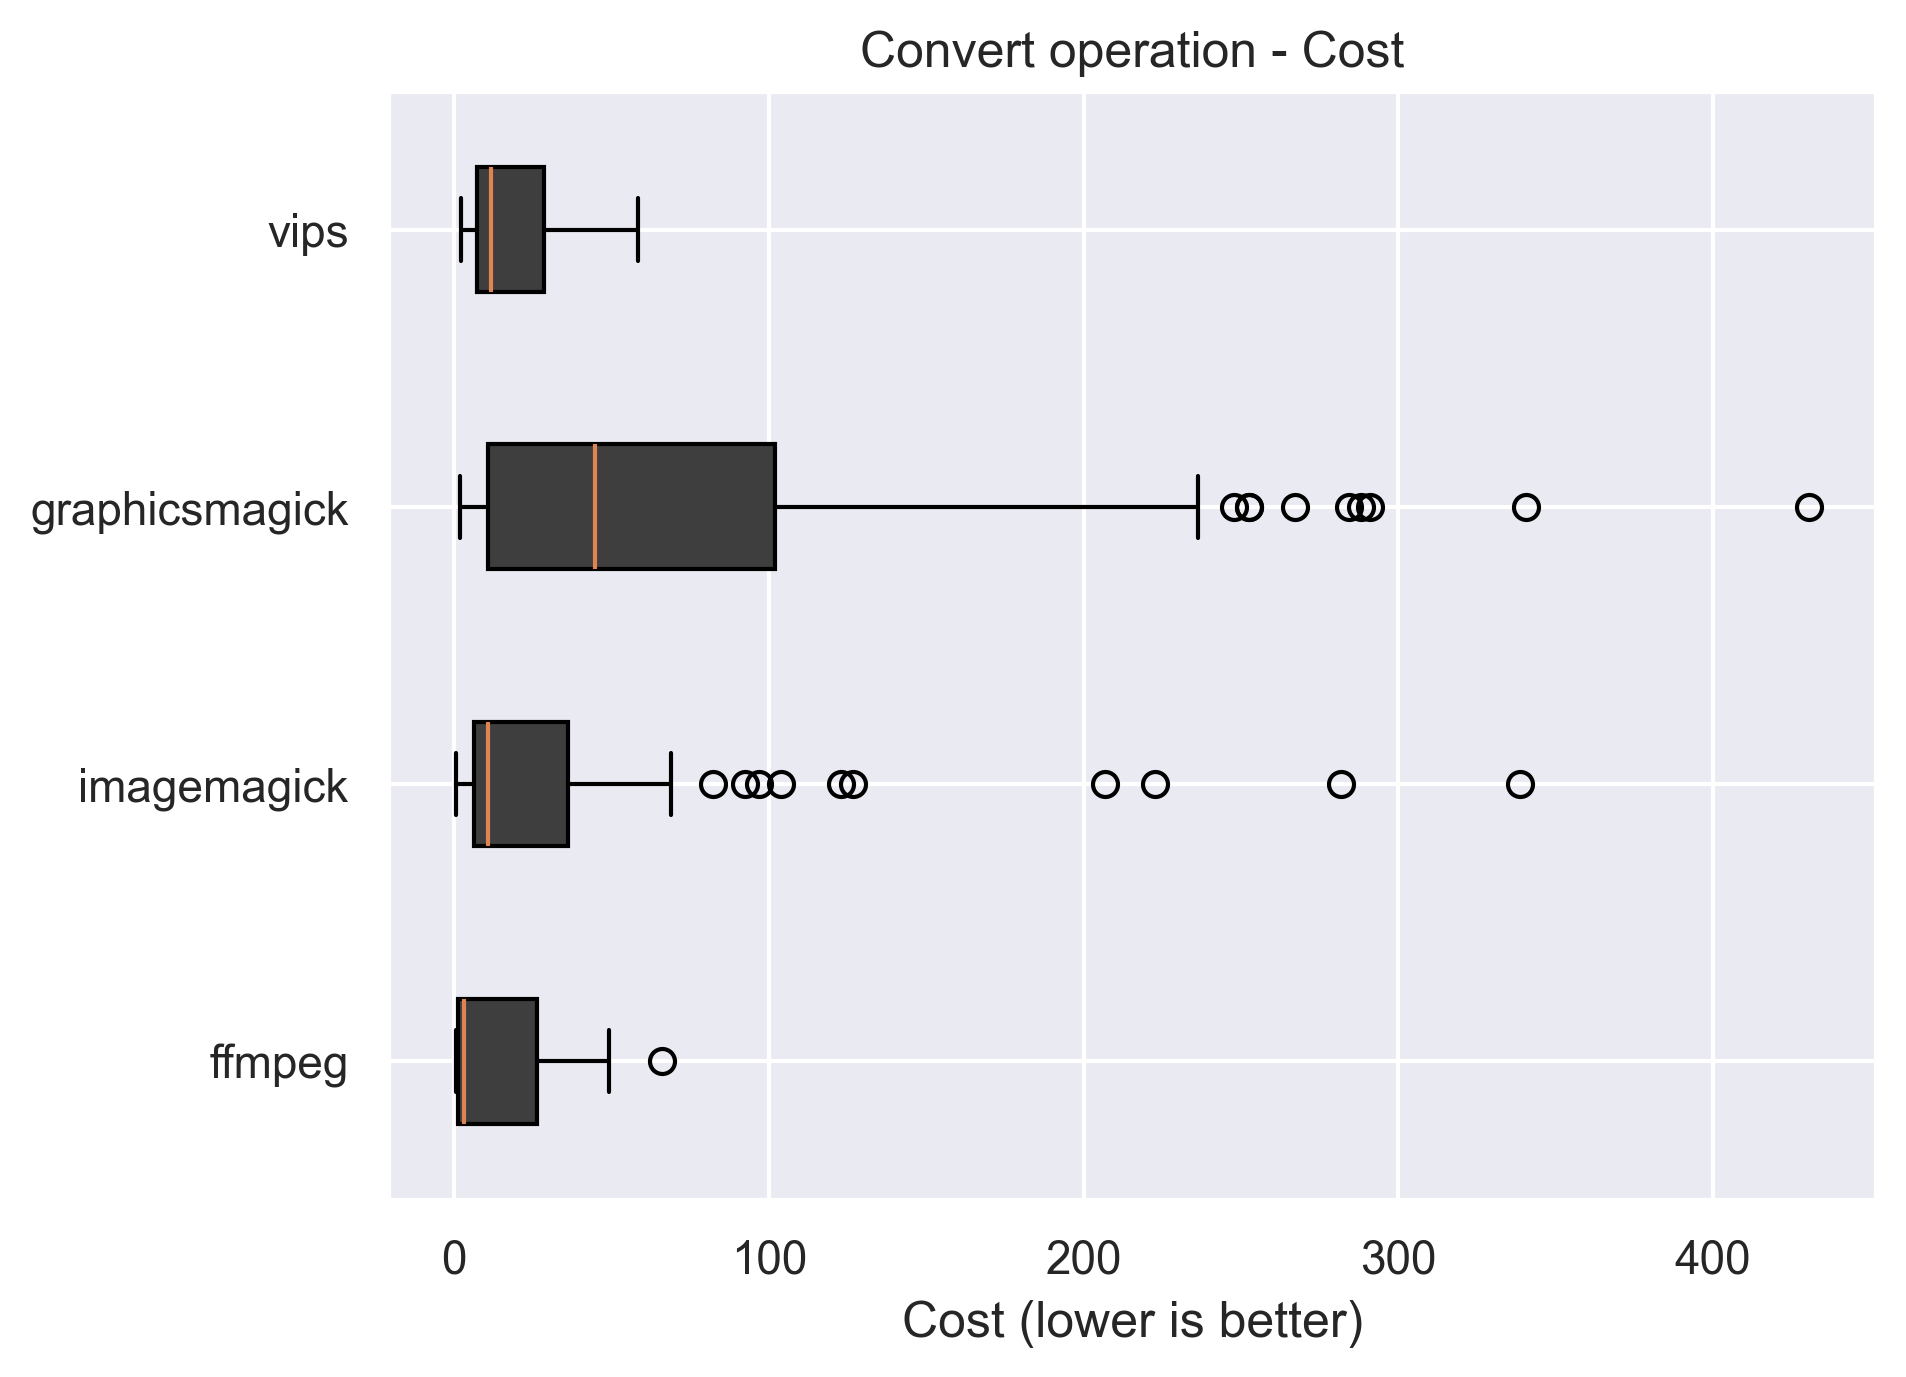

In [58]:
for operation in operations:
    fig, ax = plt.subplots(dpi=IMAGE_DPI)

    data = df[df['operation'] == operation].groupby('tool')['cost'].apply(list).values

    ax.boxplot(data, labels=tools, patch_artist=True, boxprops=dict(facecolor='#3e3e3e'), vert=False)
    ax.set_xlabel('Cost (lower is better)')
    ax.set_title(f'{operation.capitalize()} operation - Cost')

plt.show()

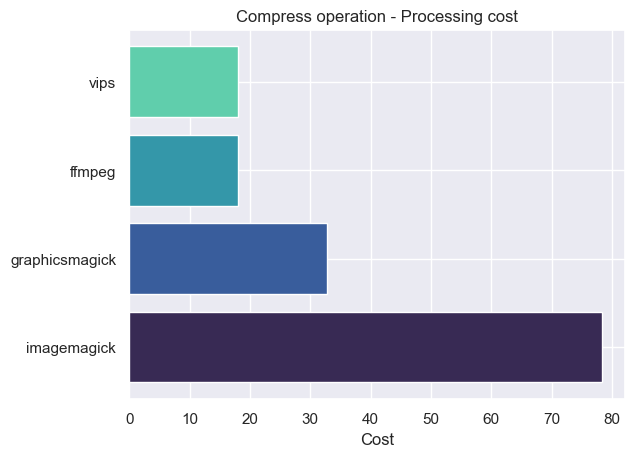

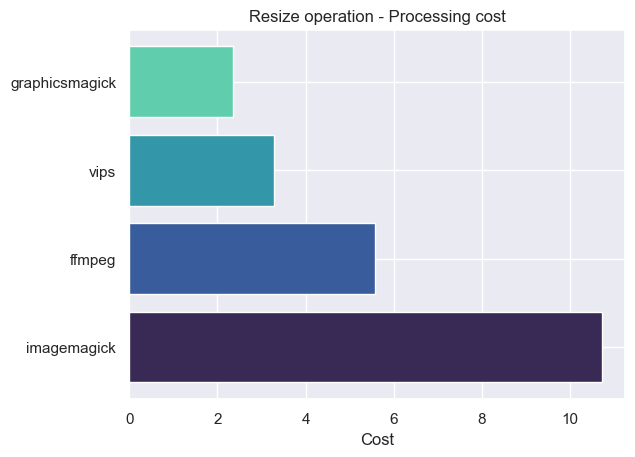

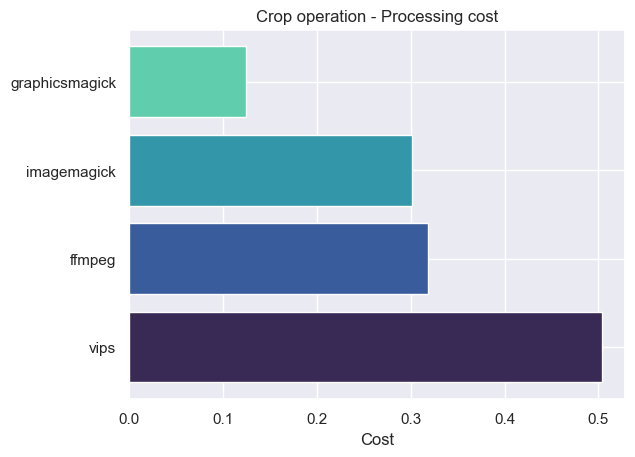

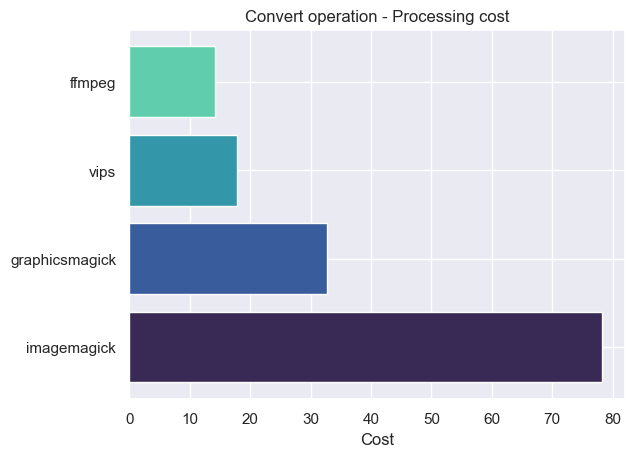

In [50]:
for operation in operations:
    fig = plt.figure(dpi=IMAGE_DPI)
    average_costs = df[df['operation'] == operation].groupby('tool')['cost'].mean().sort_values(ascending=False)
    new_colors = sns.color_palette('mako', len(average_costs))
    plt.barh(average_costs.index, average_costs, color=new_colors)
    plt.title(f'{operation.capitalize()} operation - Cost')
    plt.xlabel('Cost')
    plt.show()


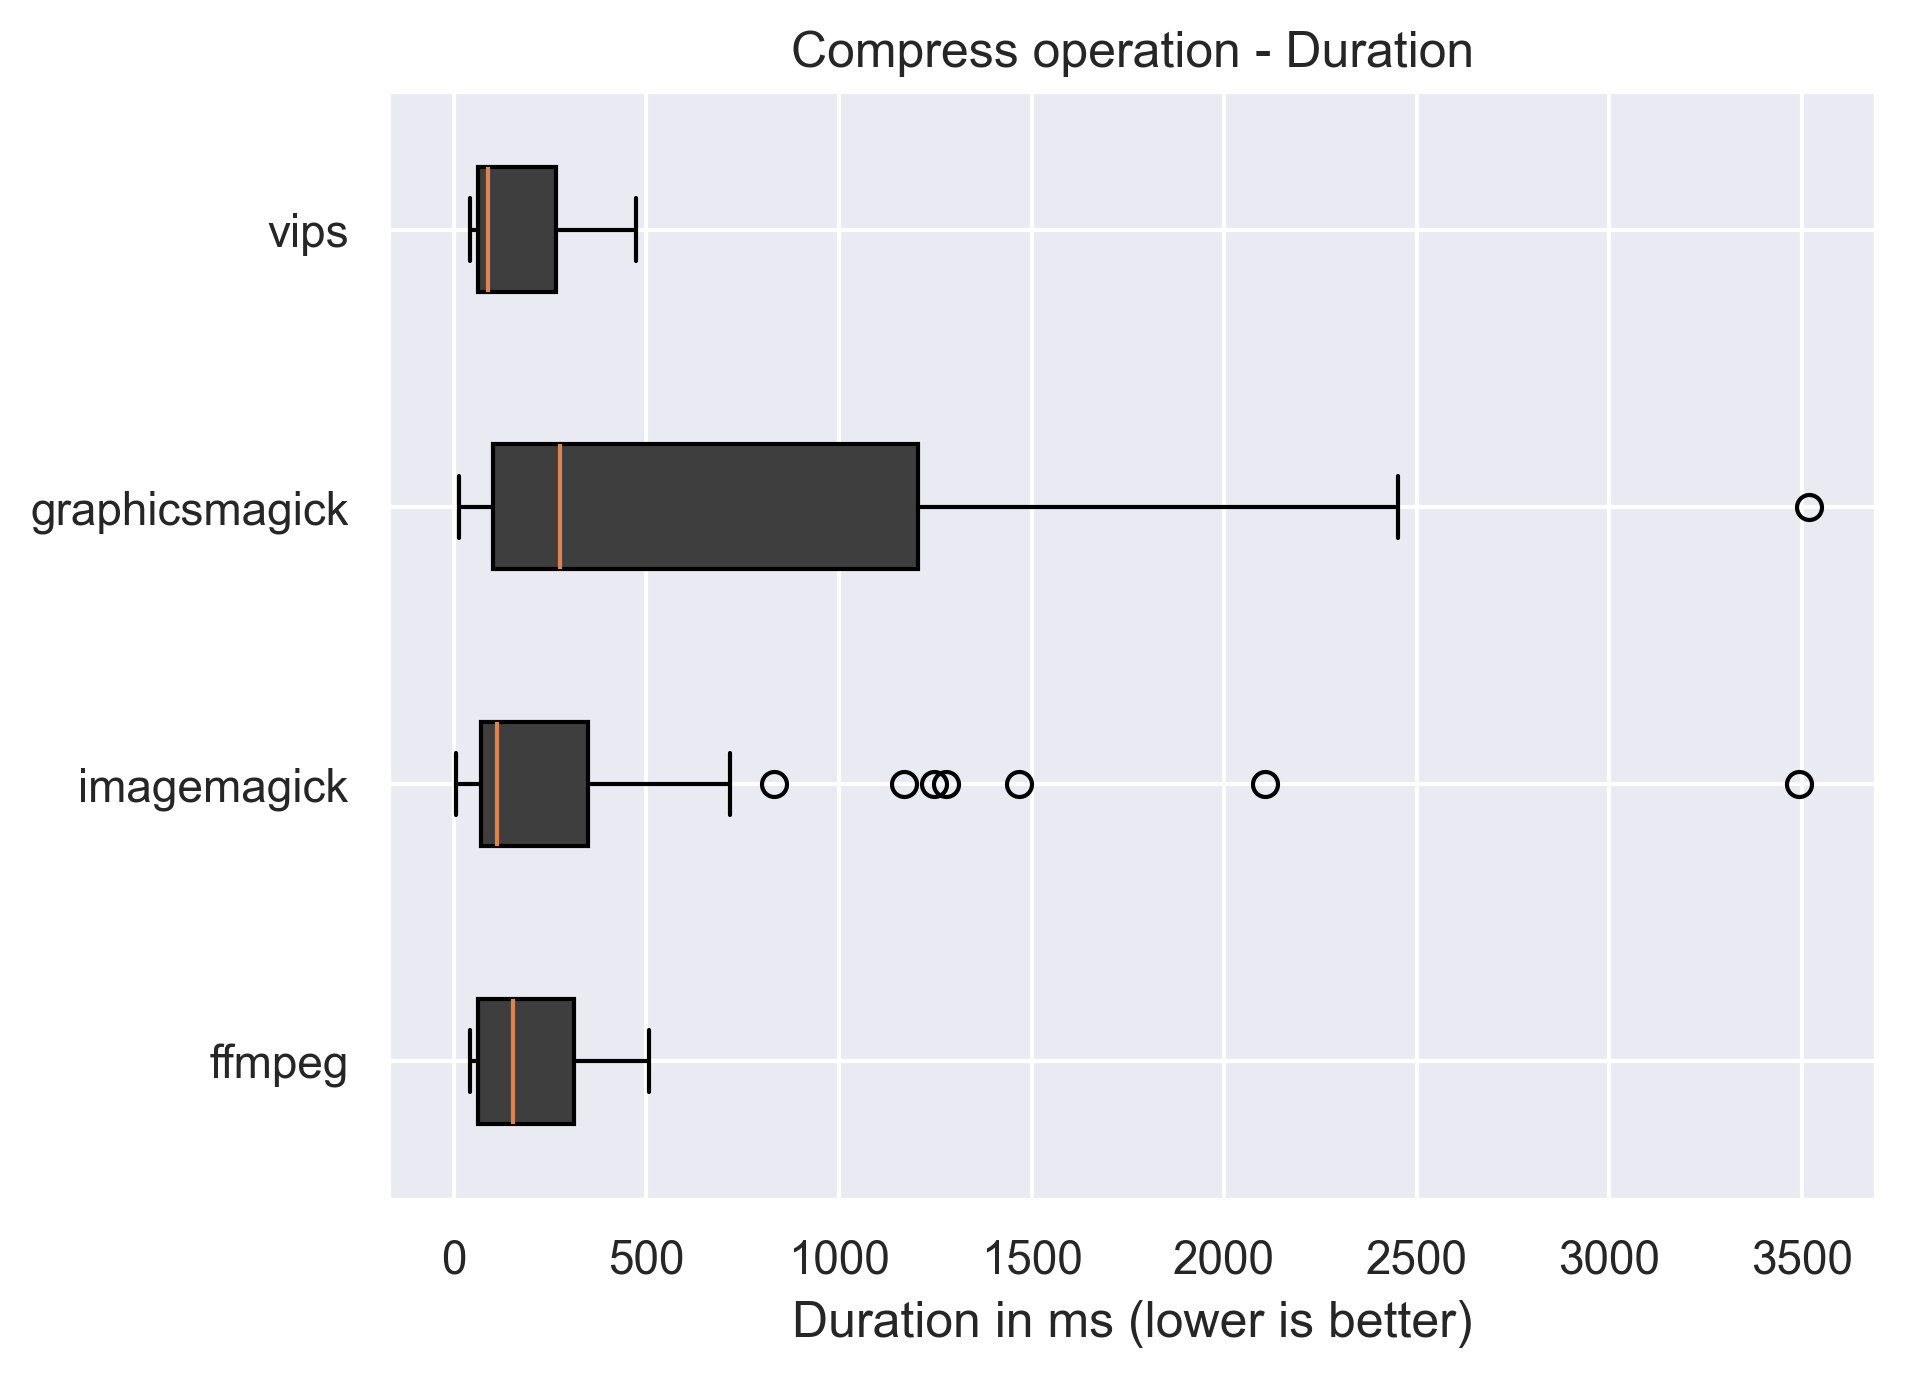

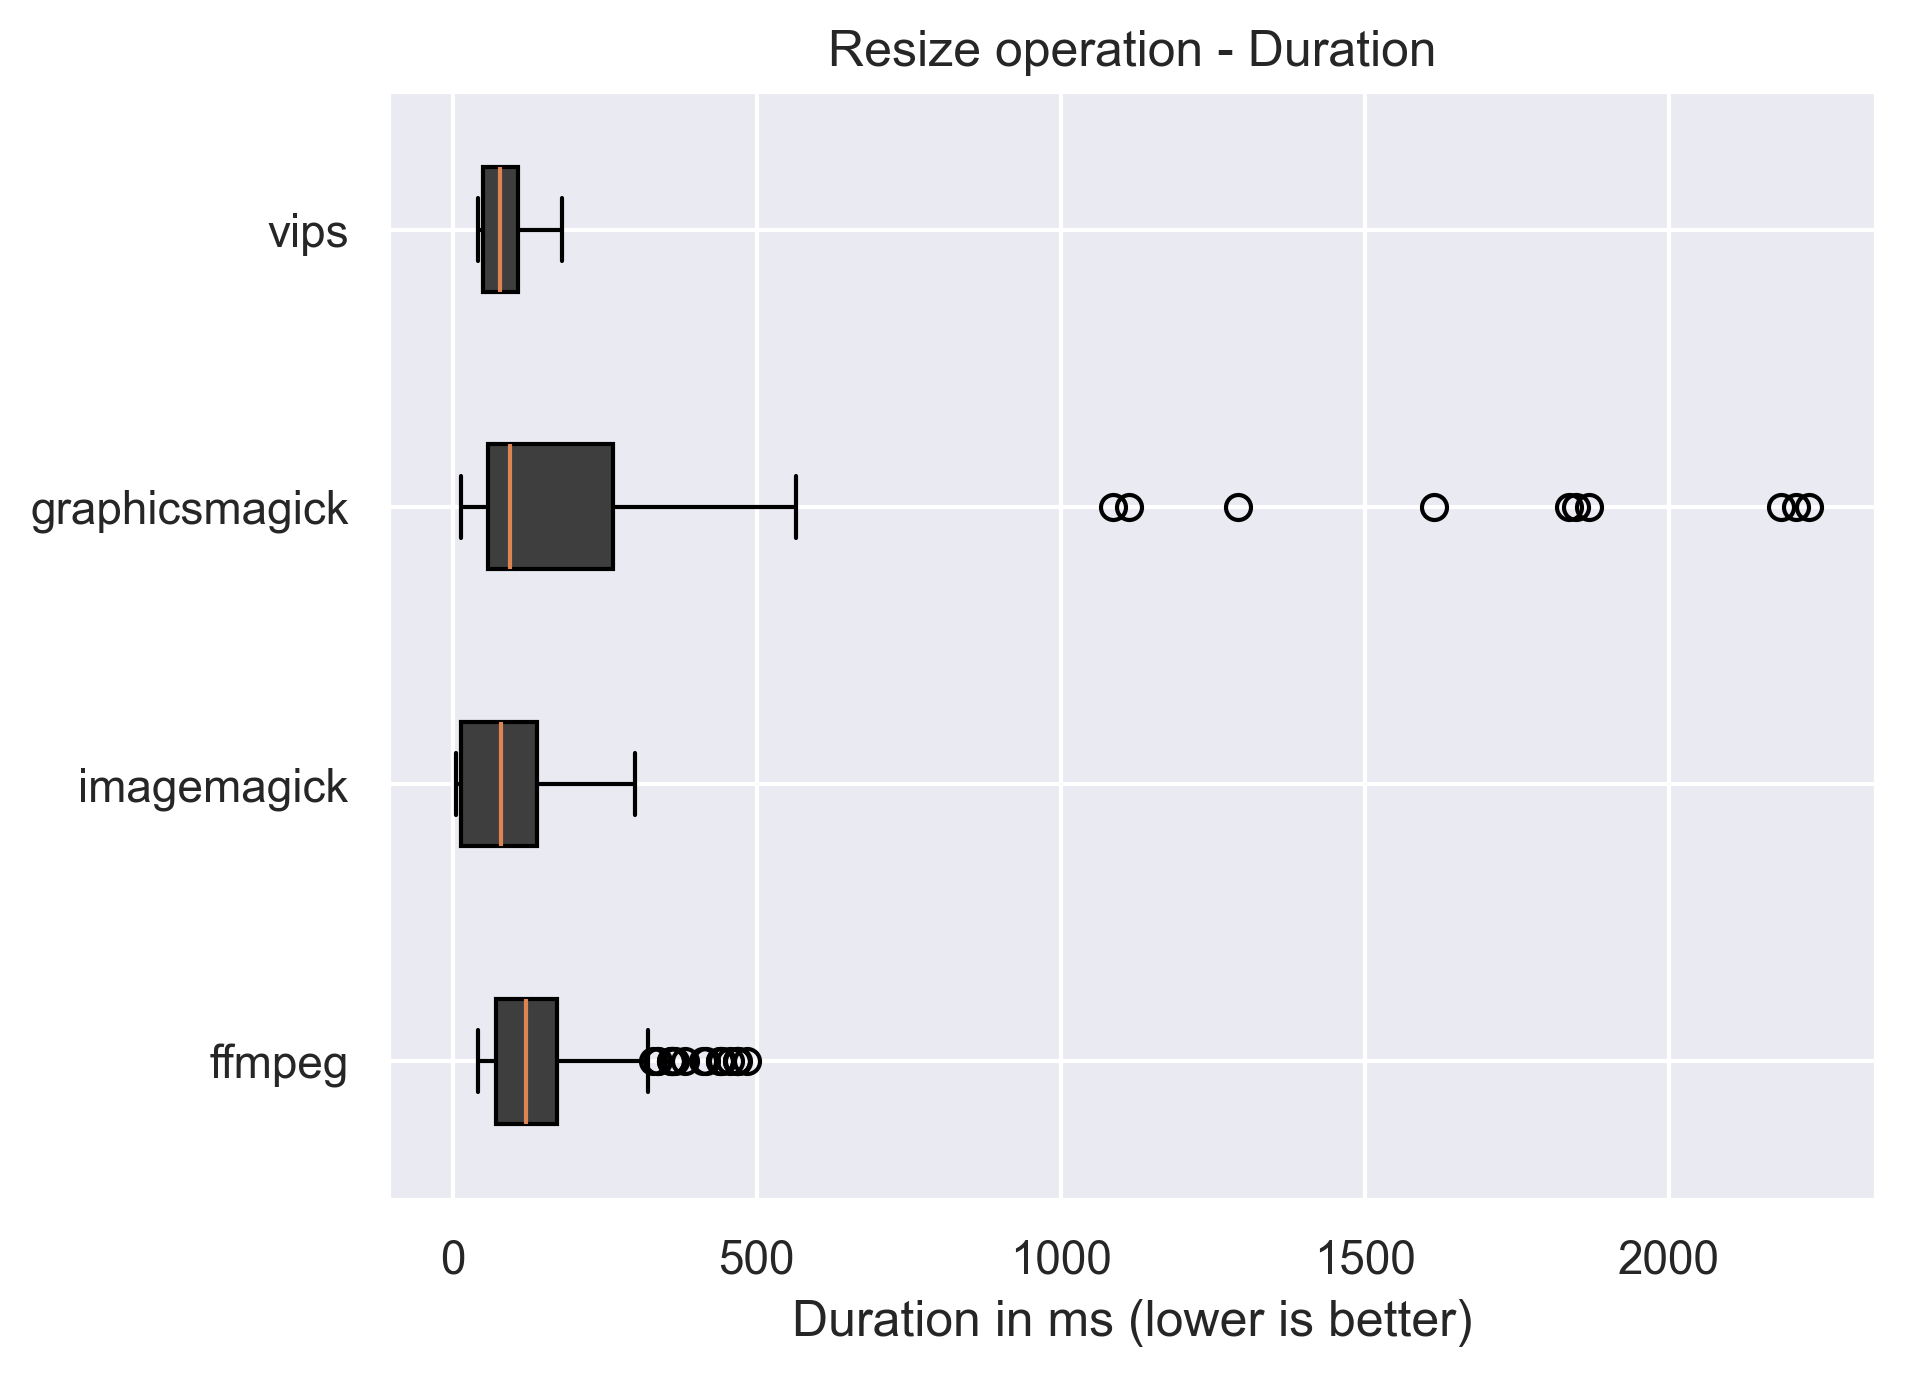

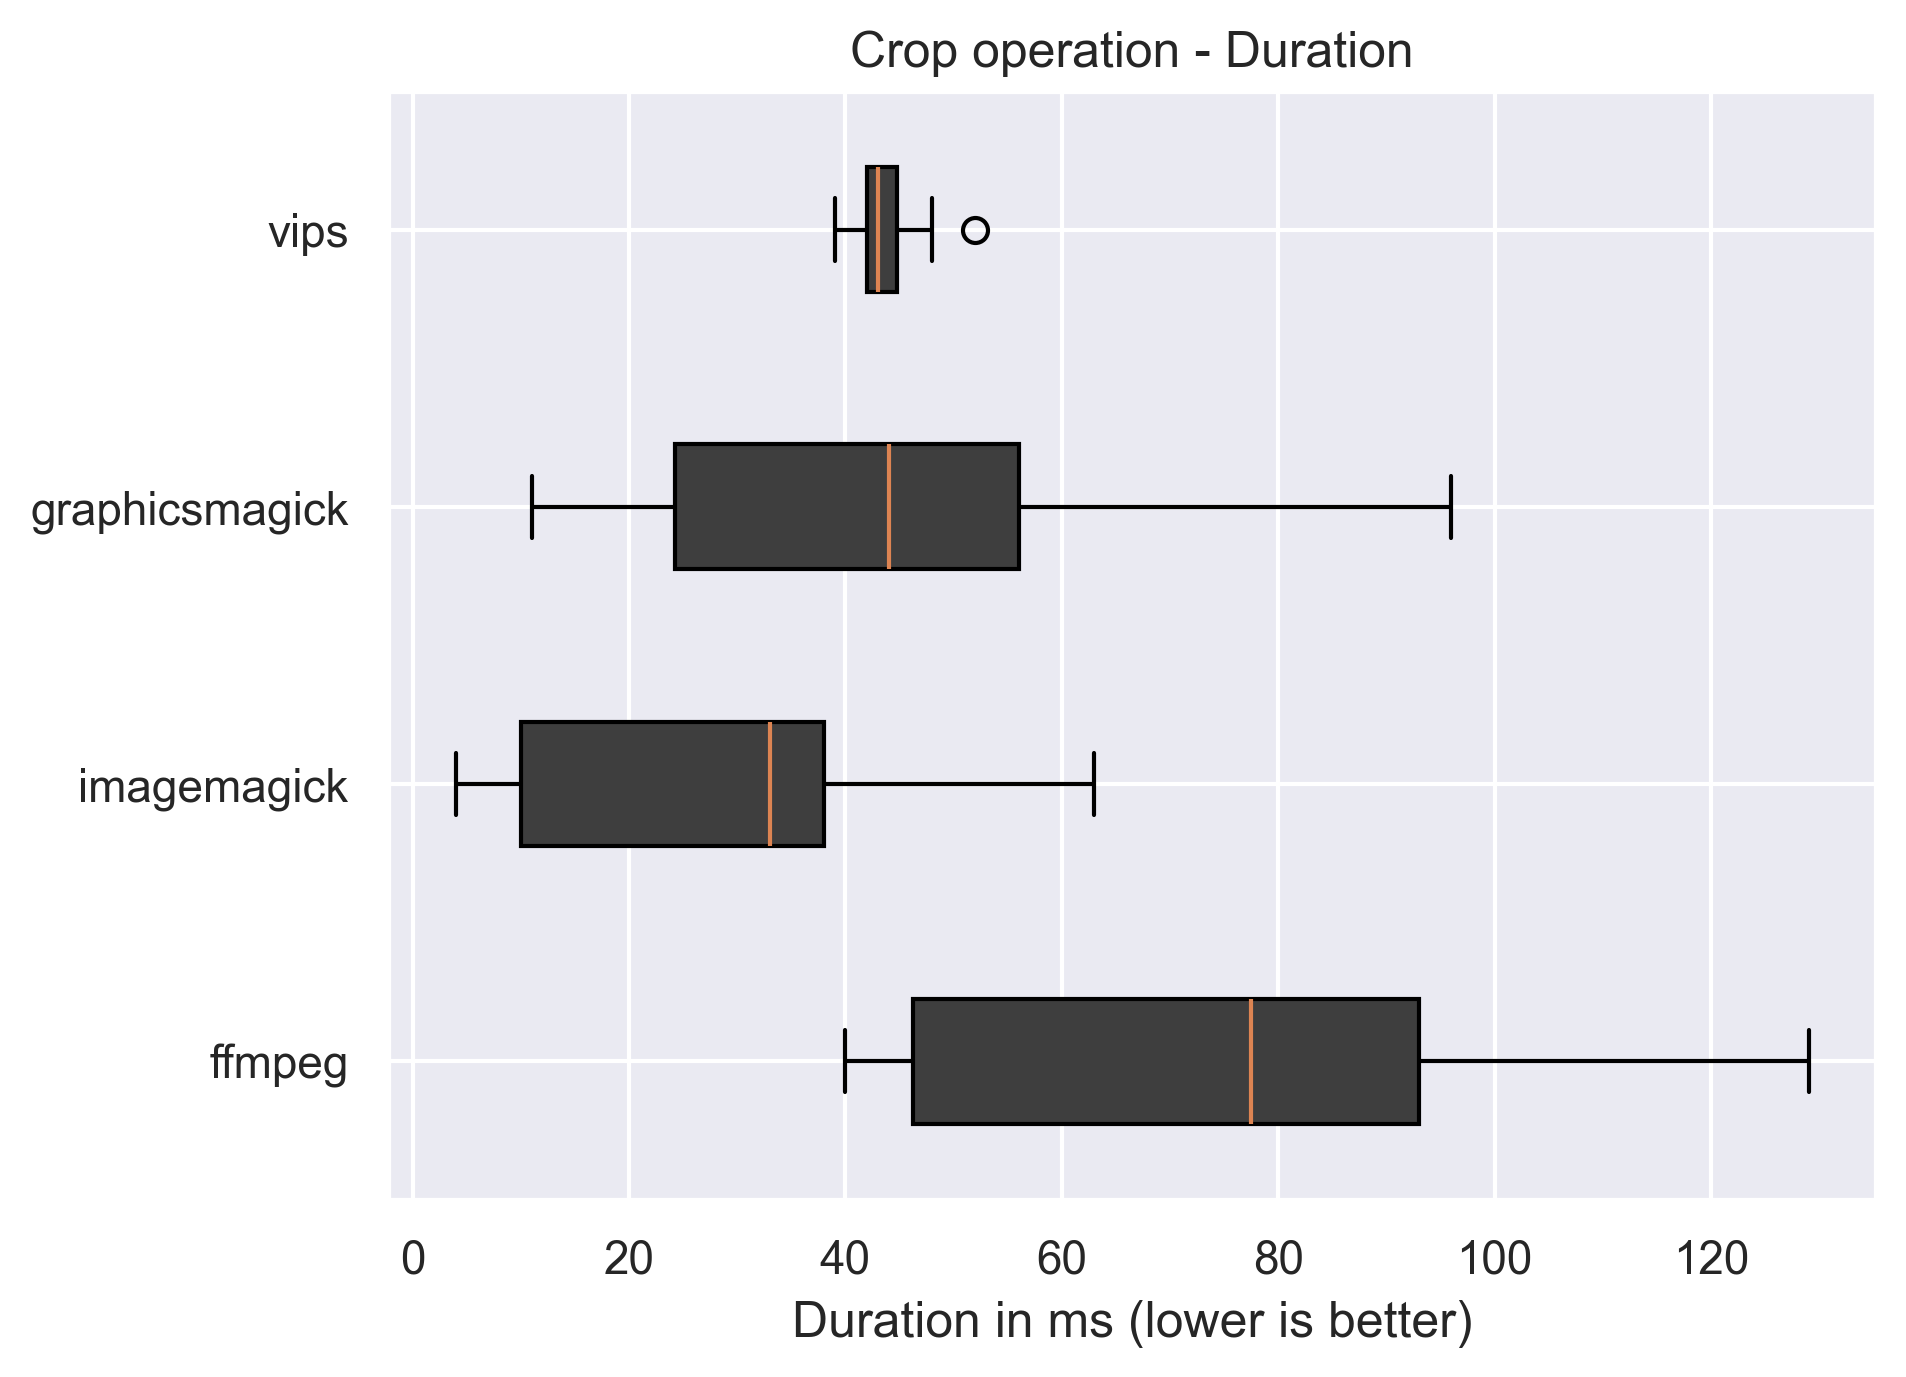

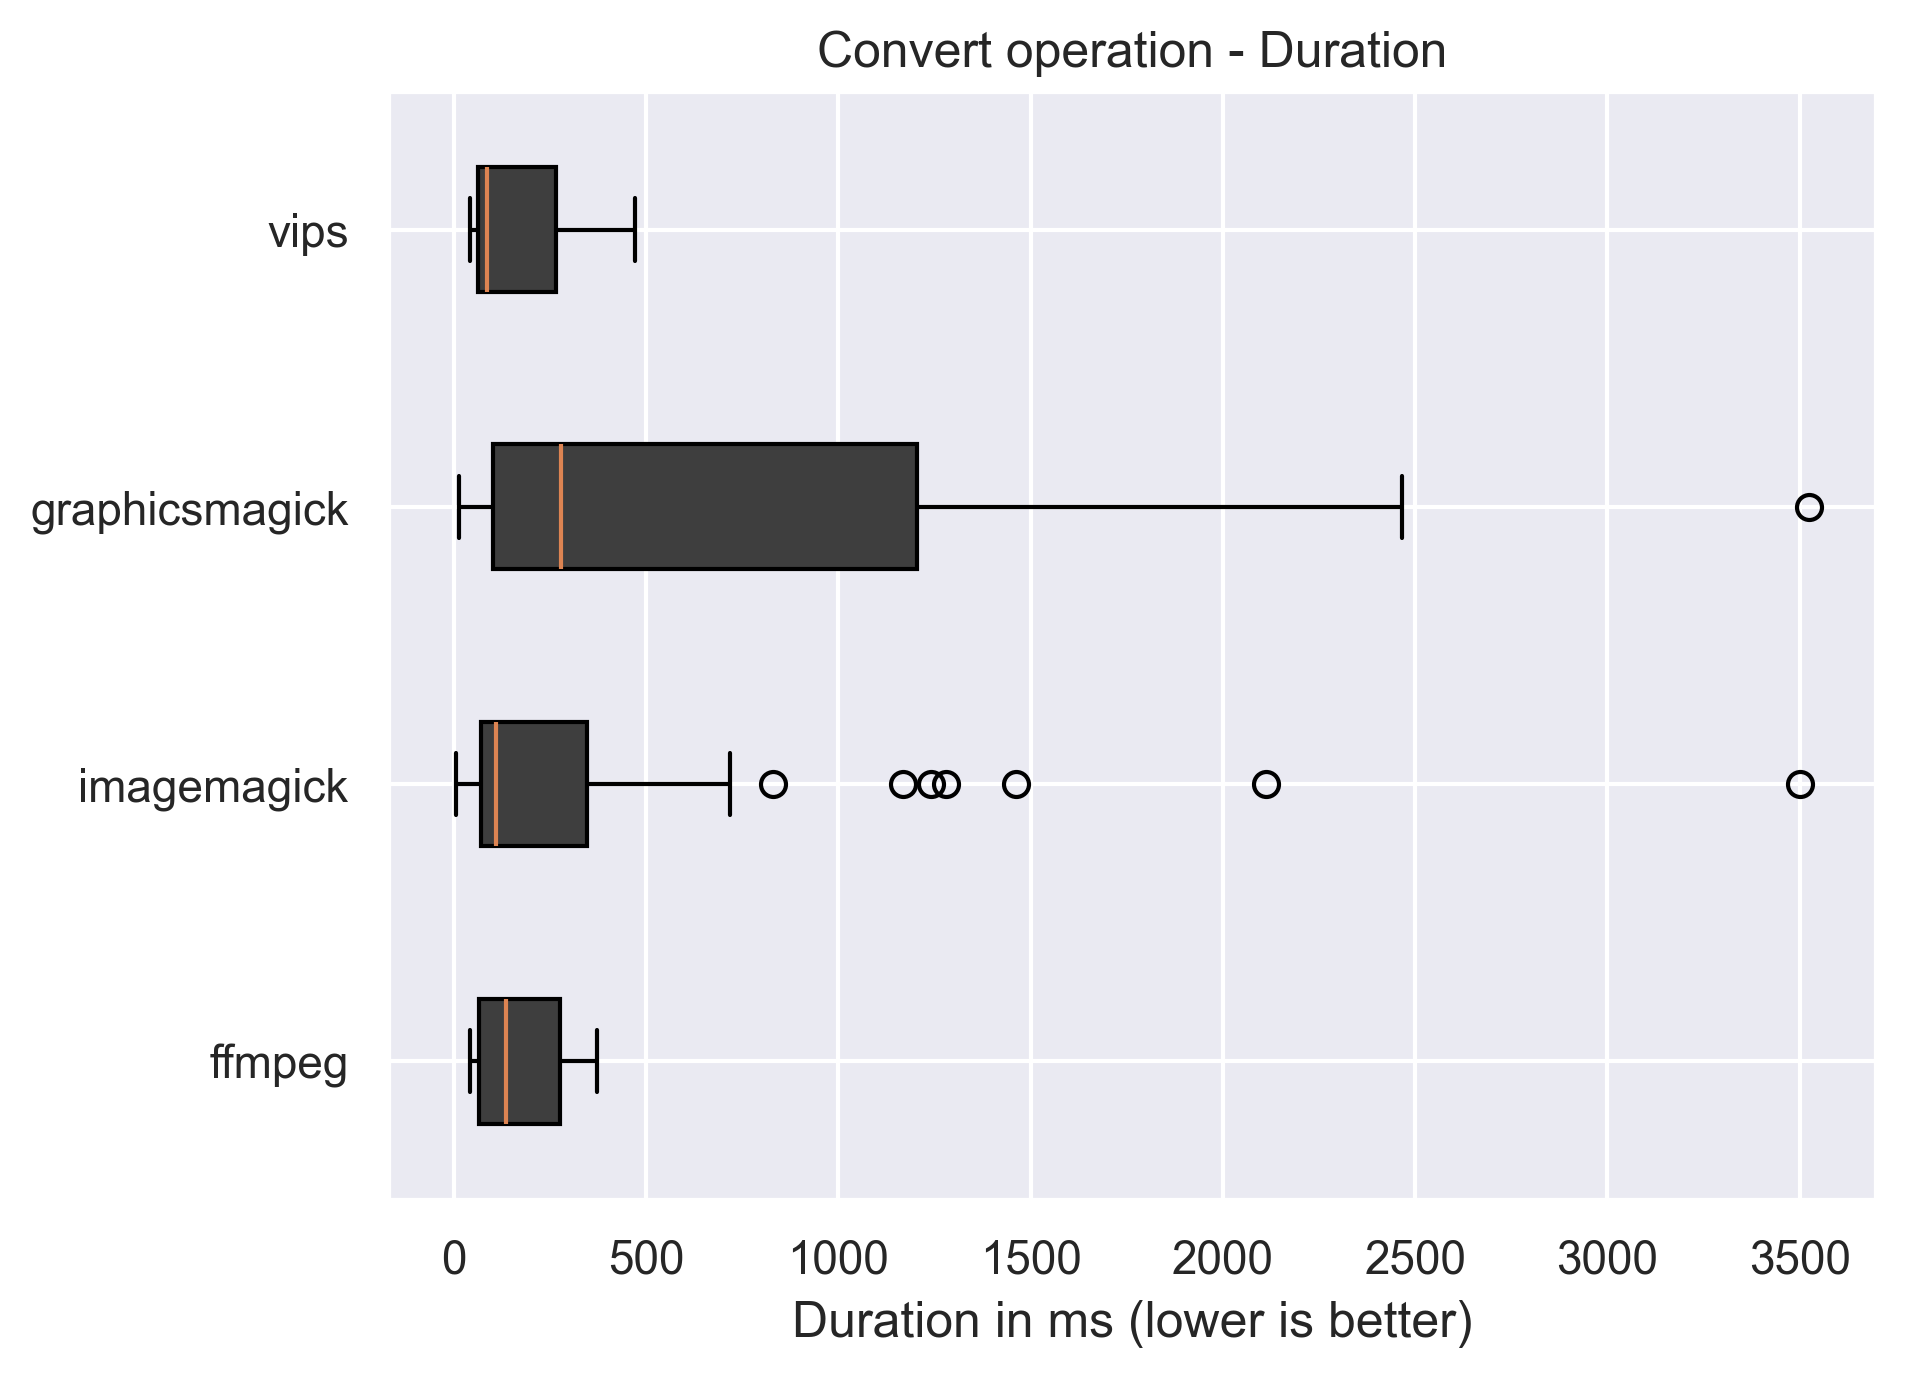

In [57]:
for operation in operations:
    fig, ax = plt.subplots(dpi=IMAGE_DPI)

    data = df[df['operation'] == operation].groupby('tool')['duration_in_ms'].apply(list).values

    ax.boxplot(data, labels=tools, patch_artist=True, boxprops=dict(facecolor='#3e3e3e'), vert=False)
    ax.set_xlabel('Duration in ms (lower is better)')
    ax.set_title(f'{operation.capitalize()} operation - Duration')

plt.show()

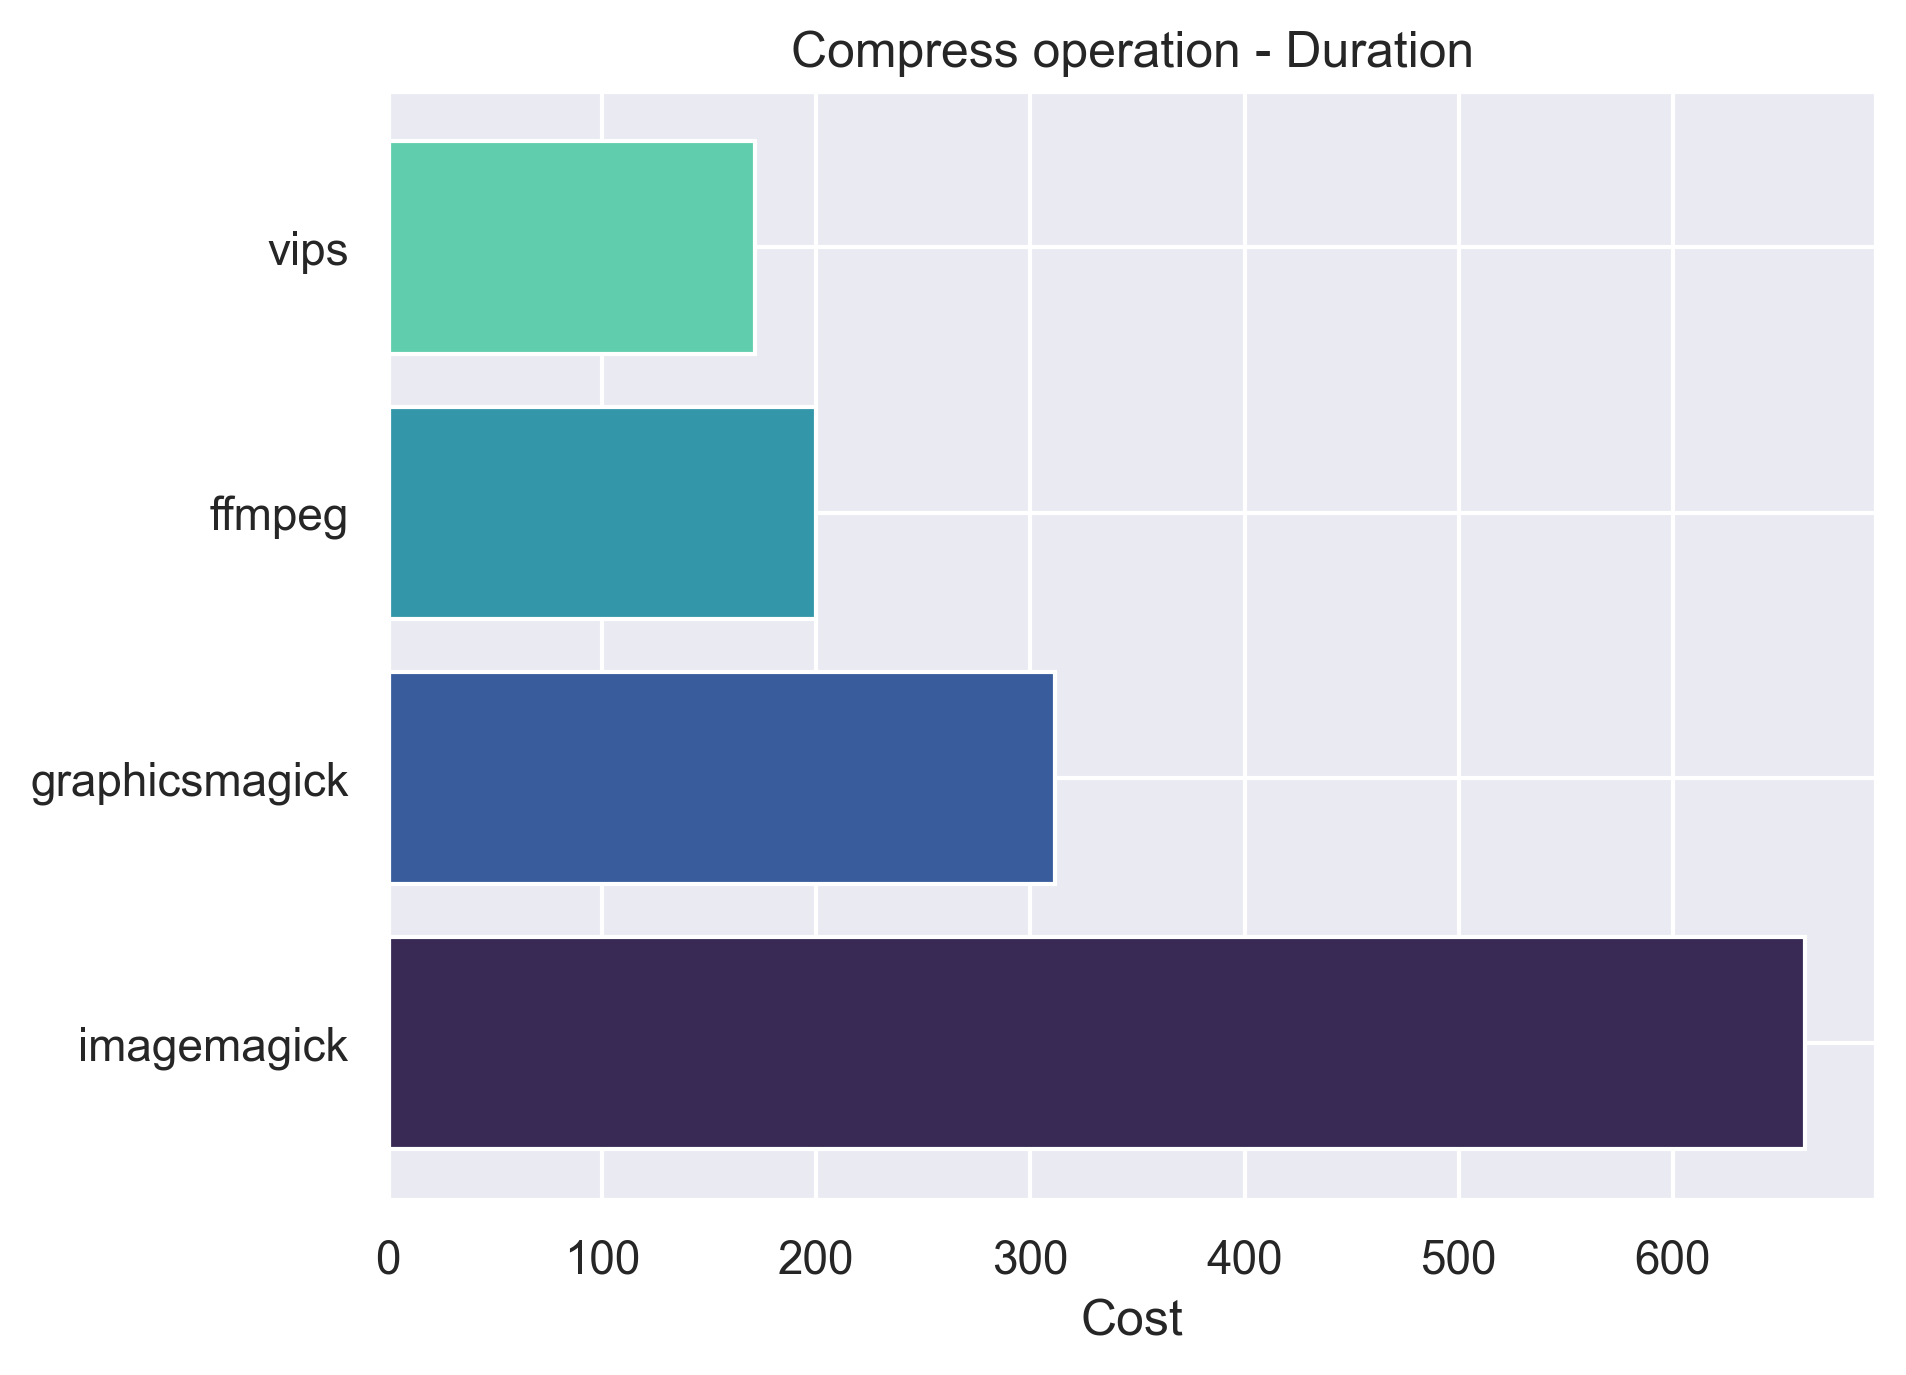

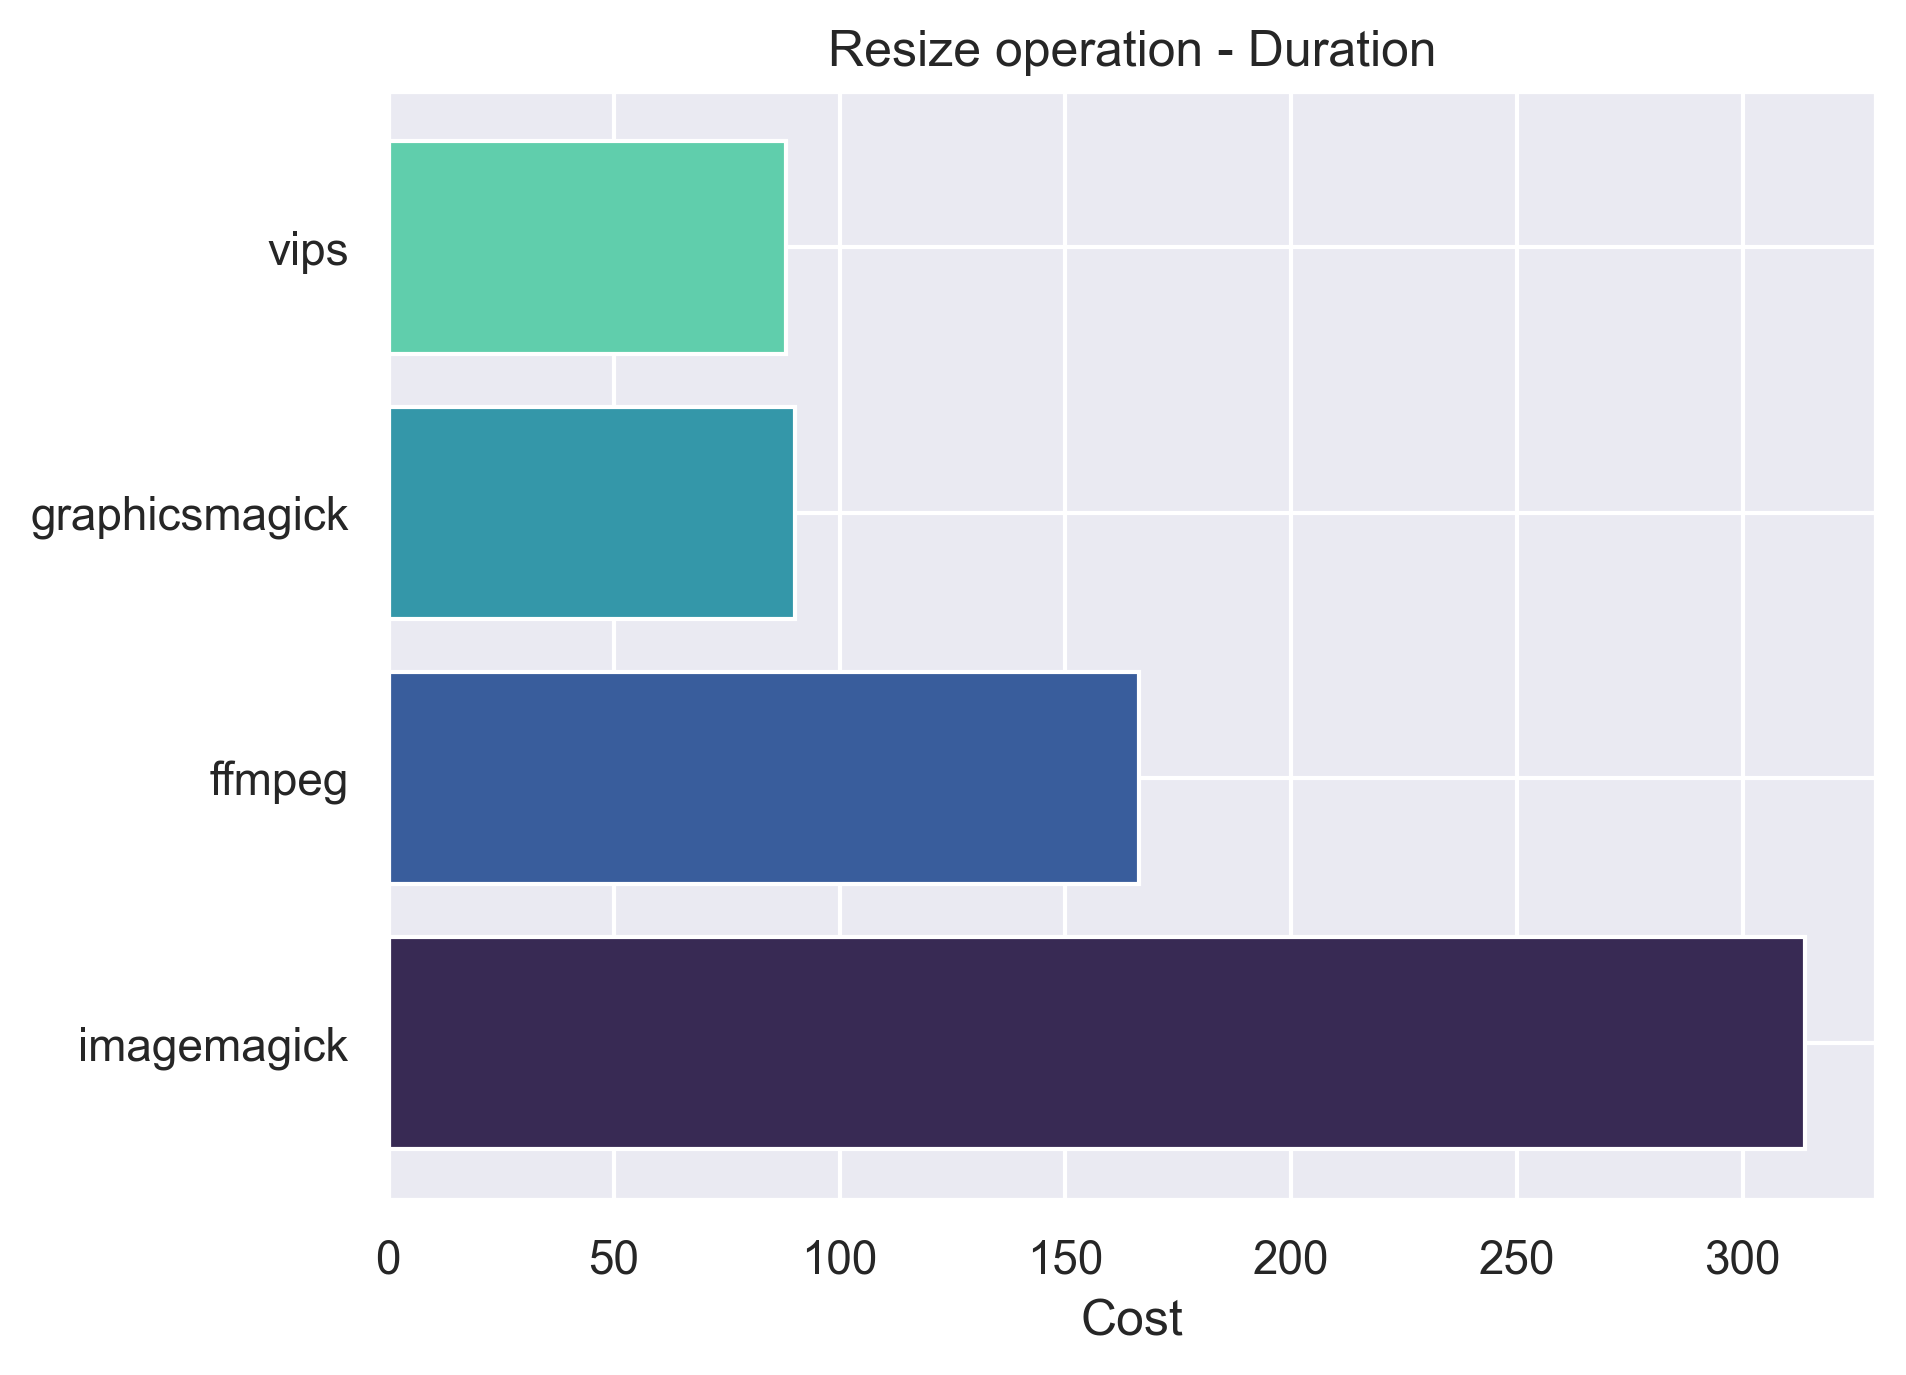

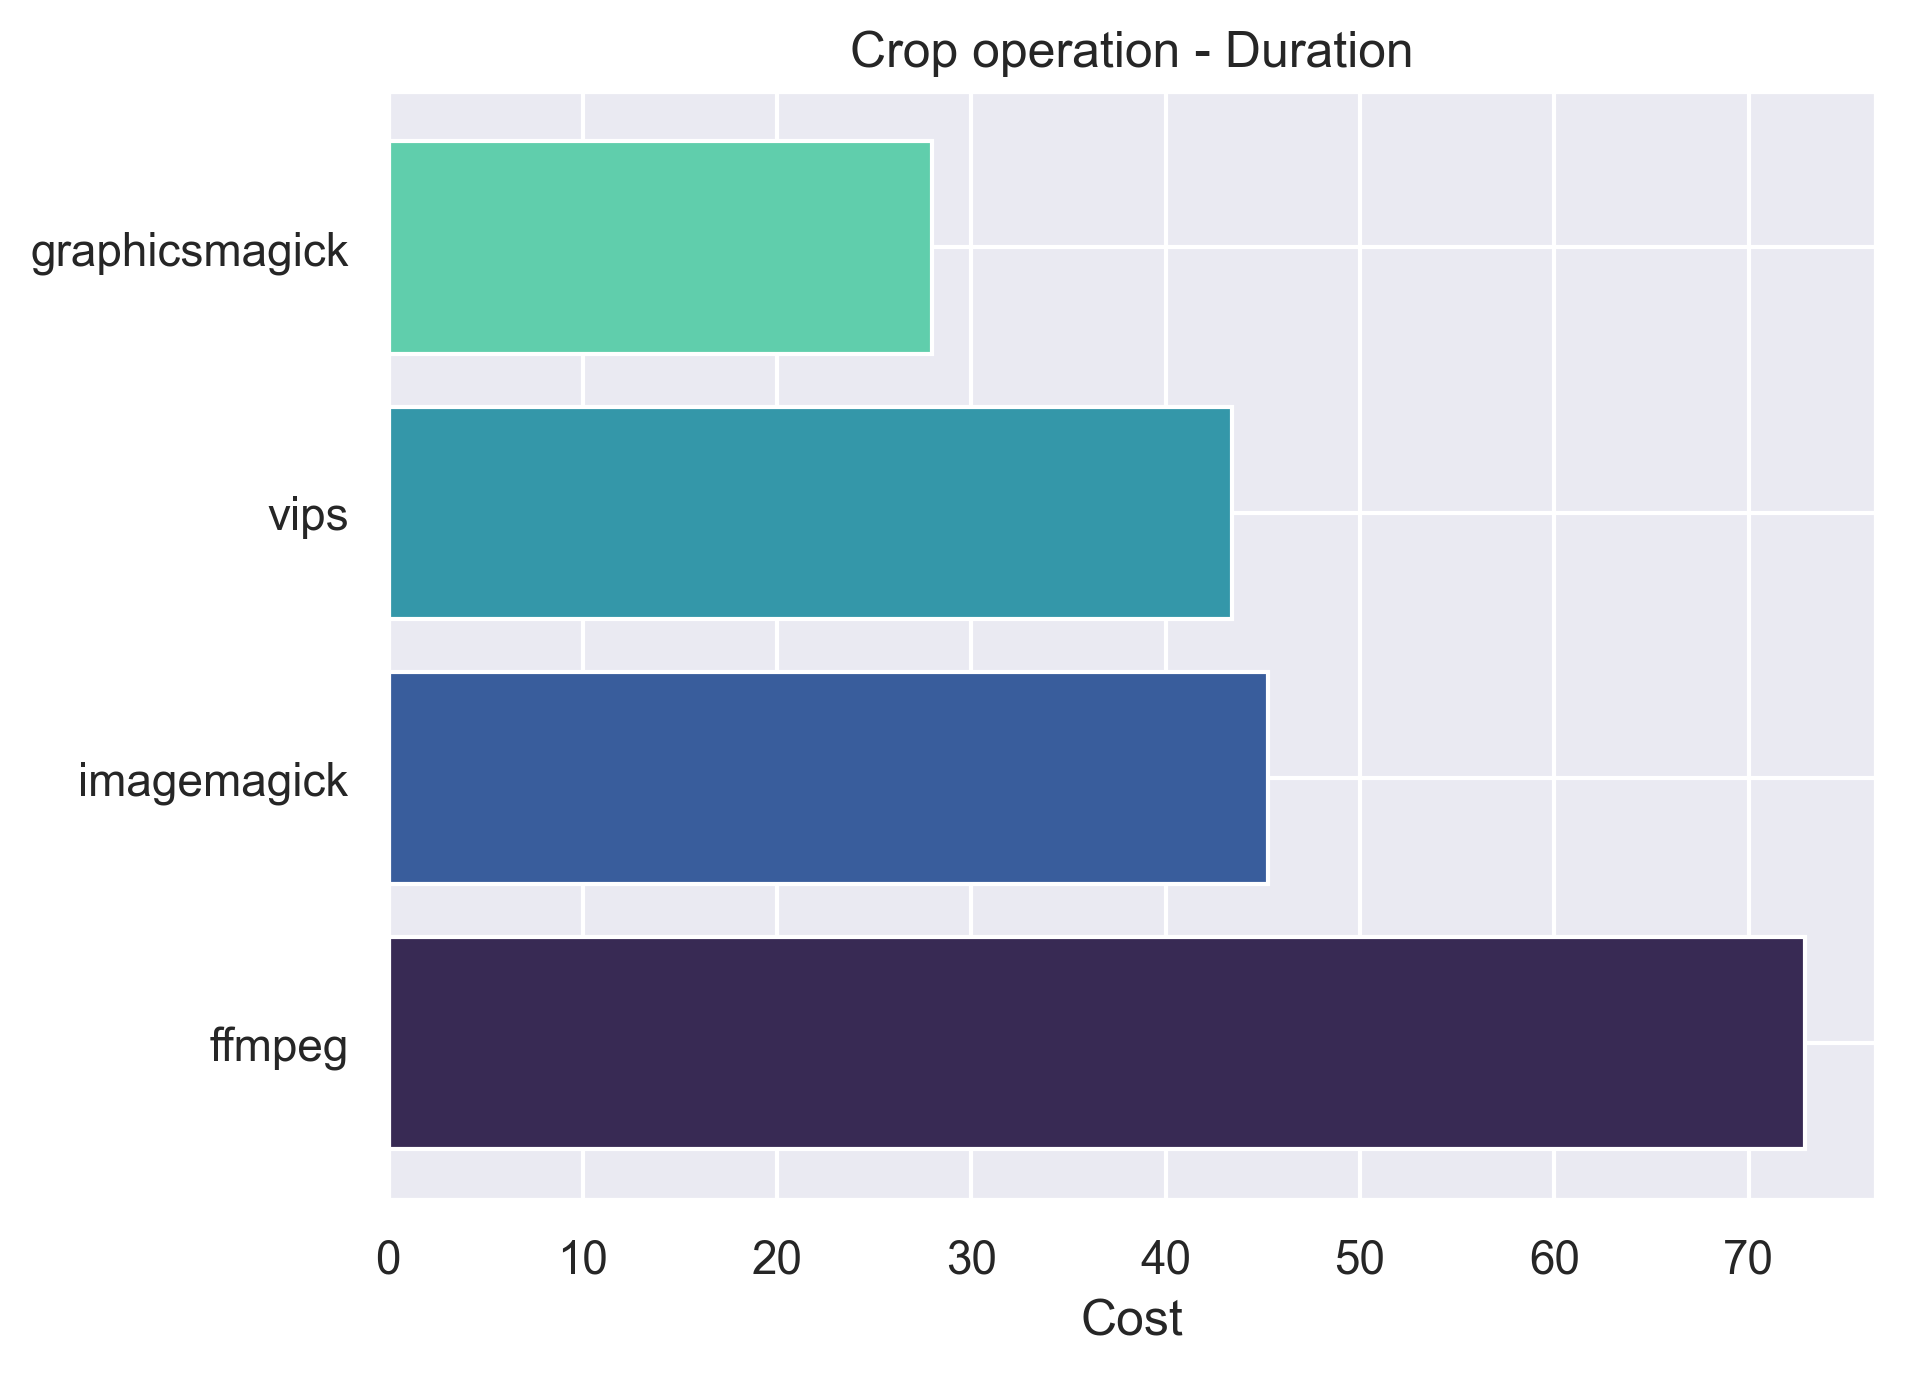

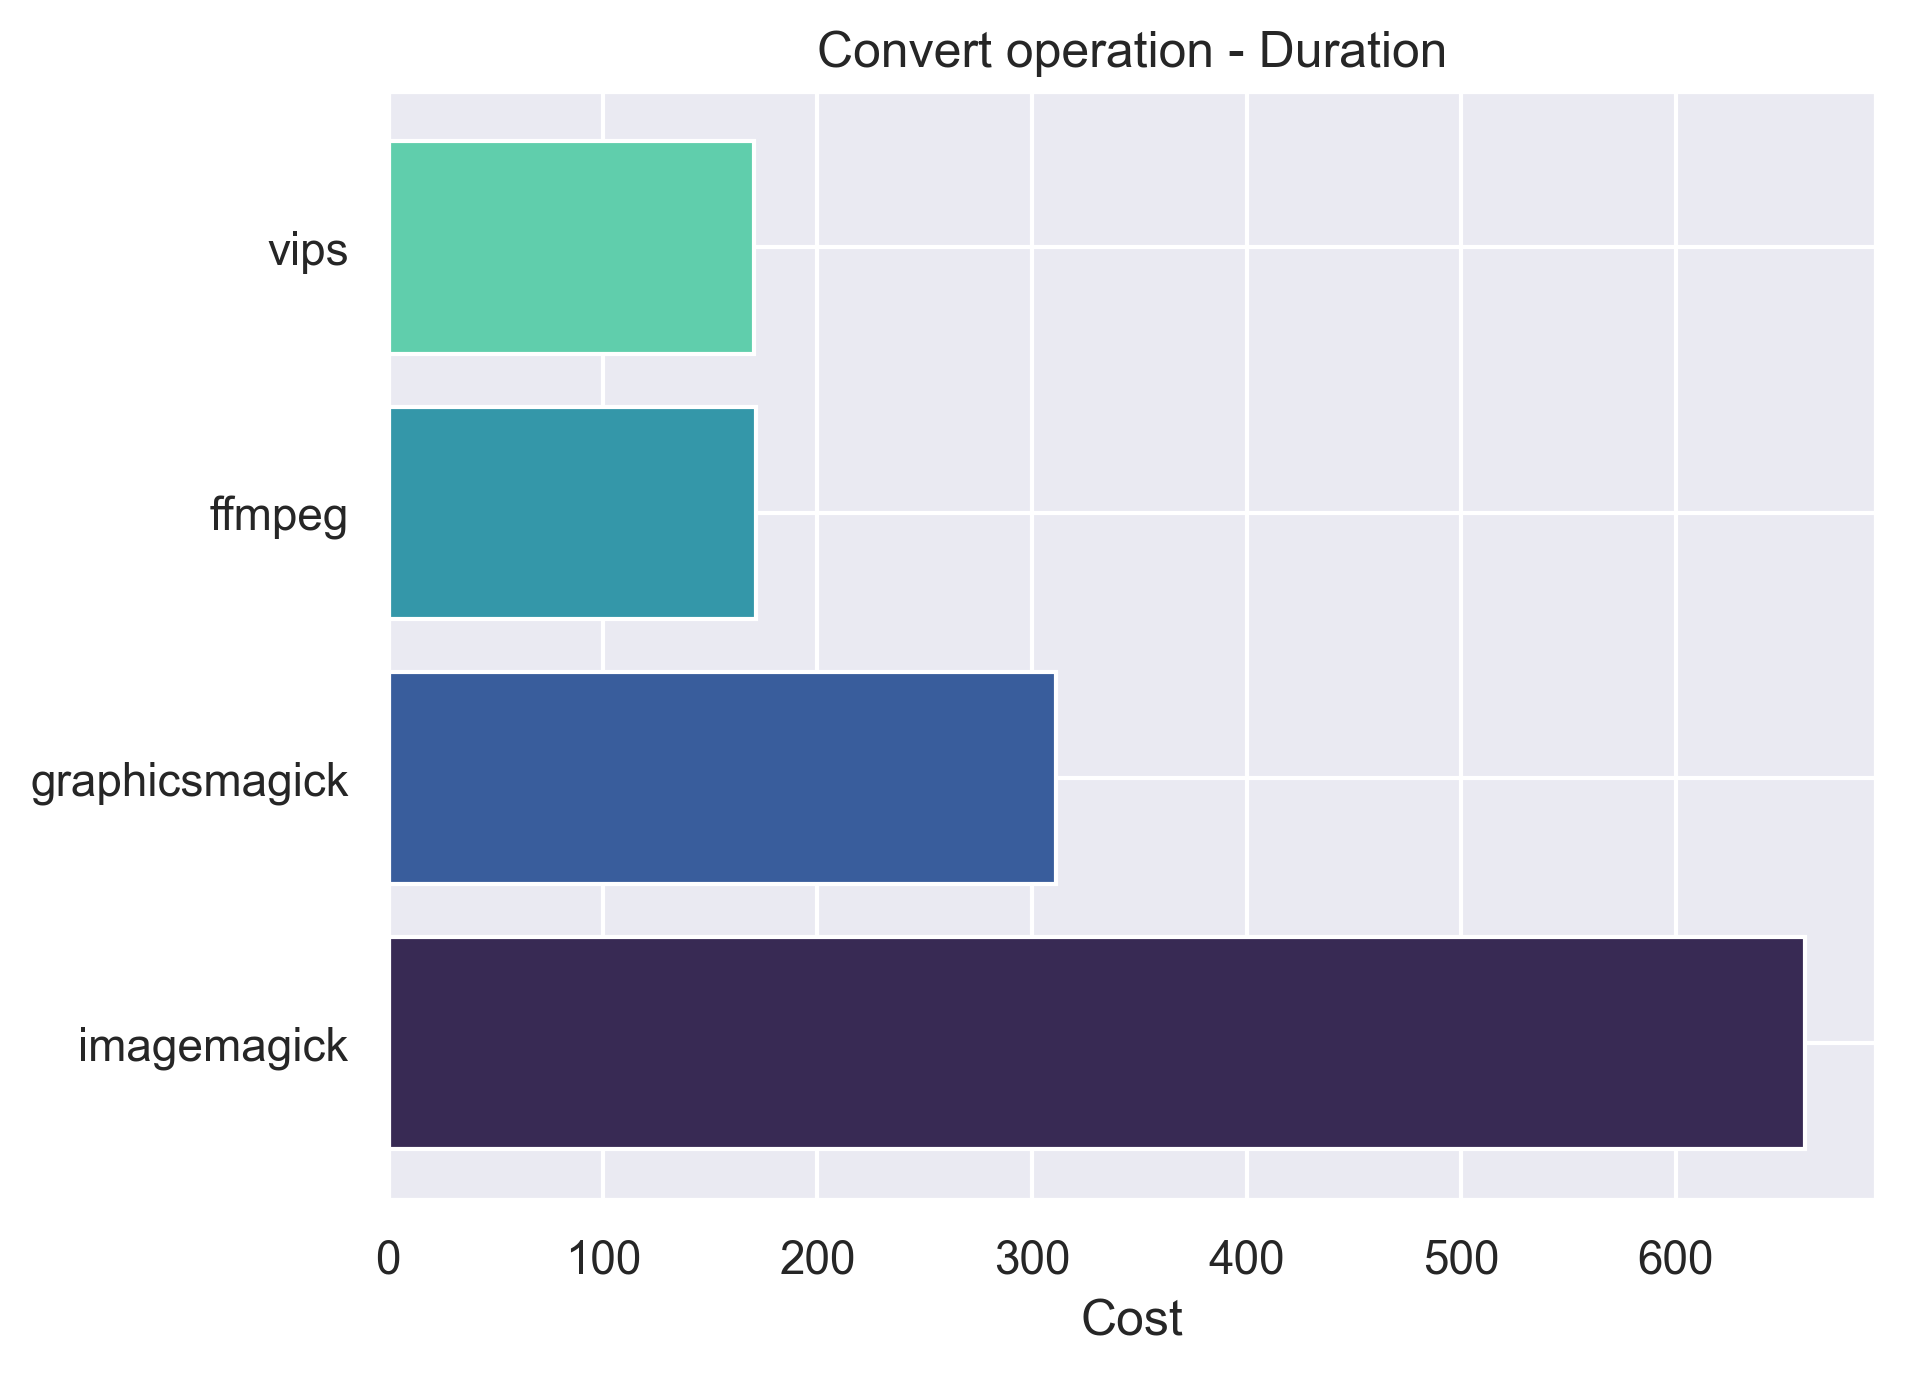

In [59]:
for operation in operations:
    fig = plt.figure(dpi=IMAGE_DPI)
    average_costs = df[df['operation'] == operation].groupby('tool')['duration_in_ms'].mean().sort_values(ascending=False)
    new_colors = sns.color_palette('mako', len(average_costs))
    plt.barh(average_costs.index, average_costs, color=new_colors)
    plt.title(f'{operation.capitalize()} operation - Duration')
    plt.xlabel('Cost')
    plt.show()
